In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [55]:
dataset = pd.read_csv('heart_disease_patients.csv')
dataset

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3,3
1,2,67,1,4,160,286,0,2,108,1,1.5,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2
3,4,37,1,3,130,250,0,0,187,0,3.5,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2
299,300,68,1,4,144,193,1,0,141,0,3.4,2
300,301,57,1,4,130,131,0,0,115,1,1.2,2
301,302,57,0,2,130,236,0,2,174,0,0.0,2


In [56]:
from sklearn.preprocessing import MinMaxScaler

col_list = list(dataset)
risk = col_list[3:11]
data_sums = pd.DataFrame()
data_sums['age'] = dataset['age']
data_sums['sex'] = dataset['sex']
data_sums['risk'] = dataset[risk].sum(axis=1)
data_sums

,age,sex,risk
0,63,1,534.3
1,67,1,562.5
2,67,1,487.6
3,37,1,573.5
4,41,0,511.4
...,...,...,...
298,45,1,508.2
299,68,1,486.4
300,57,1,382.2
301,57,0,544.0


Preprocessing using min max scaler

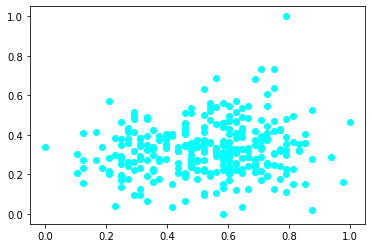

In [57]:
scaler = MinMaxScaler()
scaler.fit(data_sums[['age']])
data_sums['age'] = scaler.transform(data_sums[['age']])

scaler.fit(data_sums[['risk']])
data_sums['risk'] = scaler.transform(data_sums[['risk']])
plt.scatter(data_sums.age, data_sums['risk'], color='#00FFFF', label='cluster 6')

Elbow plot

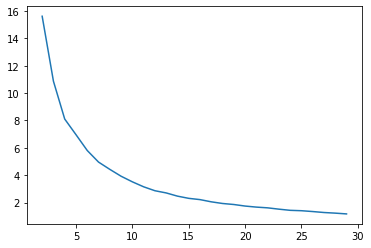

In [58]:
wcss = []
x = data_sums.iloc[:, [0,1,2]].values
for i in range(2, 30):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=200, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(2,30), wcss)
plt.show()

KMeans algorithm

In [59]:
k = KMeans(n_clusters=6)
y_predict = k.fit_predict(data_sums[['age', 'risk']])
data_sums['clusters'] = y_predict
print(k.cluster_centers_)

[[0.25968992 0.21496321]
 [0.6124031  0.53053768]
 [0.69953704 0.19540114]
 [0.77447917 0.37546396]
 [0.53313253 0.28643447]
 [0.33418367 0.3956647 ]]


Clustering plot

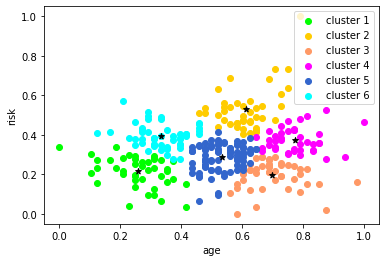

In [60]:
plt.figure()
c1 = data_sums[data_sums.clusters == 0]
c2 = data_sums[data_sums.clusters == 1]
c3 = data_sums[data_sums.clusters == 2]
c4 = data_sums[data_sums.clusters == 3]
c5 = data_sums[data_sums.clusters == 4]
c6 = data_sums[data_sums.clusters == 5]

plt.scatter(c1.age, c1['risk'], color='#00FF00', label='cluster 1')
plt.scatter(c2.age, c2['risk'], color='#FFCC00', label='cluster 2')
plt.scatter(c3.age, c3['risk'], color='#FF9966', label='cluster 3')
plt.scatter(c4.age, c4['risk'], color='#FF00FF', label='cluster 4')
plt.scatter(c5.age, c5['risk'], color='#3366CC', label='cluster 5')
plt.scatter(c6.age, c6['risk'], color='#00FFFF', label='cluster 6')

plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:, 1], color="black", marker='*')

plt.xlabel('age')
plt.ylabel('risk')
plt.legend()